# Using Seaborn and Matplotlib to Visualize Data

In [1]:
import pandas as pd
import numpy as np
import os 

### Load the Dataset 



In [2]:
filename = os.path.join(os.getcwd(), "data", "adult.data.partial")
df = pd.read_csv(filename, header=0)

### Glance at the Data

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,label
0,36,State-gov,112074,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Non-Female,0,0,45,United-States,<=50K
1,35,Private,32528,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Non-Female,0,0,45,United-States,<=50K
2,21,Private,270043,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States,<=50K
3,45,Private,168837,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,24,Canada,>50K
4,39,Private,297449,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,0,40,United-States,>50K


###  Get the Dimensions of the Dataset

In [ ]:
df.shape

## Plotting One Feature Using Seaborn and Matplotlib

In this program, you will be working with visualization packages Seaborn and Matplotlib.

<b>Matplotlib</b>
Matplotlib is the cornerstone of many plotting activities in Python. It is both a widely used plotting package in its own right, and serves as the basis of plotting within both Pandas and Seaborn, which offer plotting functionality more centered on Pandas DataFrames.

Matplotlib offers some different interfaces for plotting data, but the most widely used is the pyplot interface. Because `matplotlib.pyplot` is a lot to type, it is conventionally shortened on import as `plt`. The `plt` module provides many different functions for plotting data, customizing plots, and annotating plots. For more information about Matplotlib, consult the online [documentation](https://matplotlib.org/stable/api/index).

<b>Seaborn</b>
Seaborn is a plotting package that leverages the power of Matplotlib, but specializes and refines that interface to support visualization of tabular data and their statistical properties. It is therefore works well with Pandas DataFrames.  By convention, `seaborn` is imported as ```sns```, a module that contains a variety of different plotting functions, as outlined in the online <a href="https://seaborn.pydata.org/api.html">documentation</a>.

Load `matplotlib` and `seaborn` packages using their conventional shorthand names `plt` and `sns`.

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme() # this line activates a signature aesthetic that makes seaborn plots look better

### Produce a Histogram of a Feature

Plotting a histogram of a given column is a common way to understand what is the distribution of this feature in your dataset. Here is how to do it using the `histplot()` function from the `seaborn` package:

<AxesSubplot:xlabel='age', ylabel='Count'>

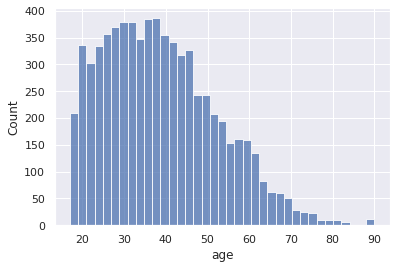

In [5]:
sns.histplot(data=df, x="age")

The code cell above plotted the `age` column. Practice using `seaborn` by plotting a histogram of the `hours-per-week` column. Hint: use the same code above and just replace the column name. 

Your plot should look like this:<br> <img src="img/plotsample.png" width=400 height=400 align="left"/>

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

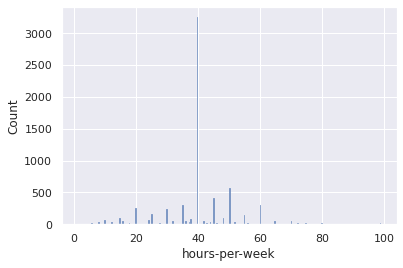

In [7]:
sns.histplot(data=df, x='hours-per-week')

### Produce a Histogram of a Logarithm of the Same Feature

First, let's look at a straightforward way to do so -- by transforming a column and then plotting it as ususal

<AxesSubplot:xlabel='age', ylabel='Count'>

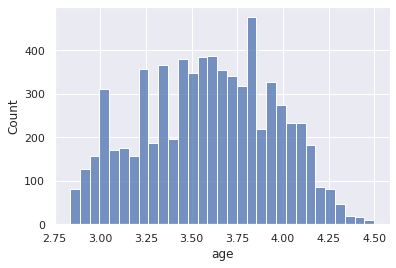

In [8]:
sns.histplot(data=np.log(df['age']))

However, this can also be done easier by using the `log_scale` parameter of the `sns.histplot()` function.

<AxesSubplot:xlabel='age', ylabel='Count'>

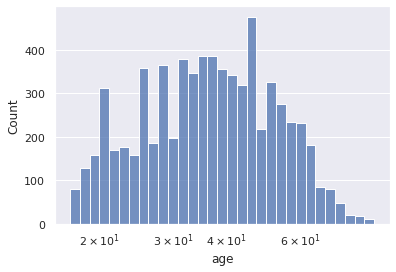

In [9]:
sns.histplot(data=df, x="age", log_scale=True)

Practice this second method of plotting a variable on a logarithmic scale, thise time for the `hours-per-week` column. Your plot should look like this:<br> <img src="img/plotsample2.png" width=400 height=400 align="left"/>

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

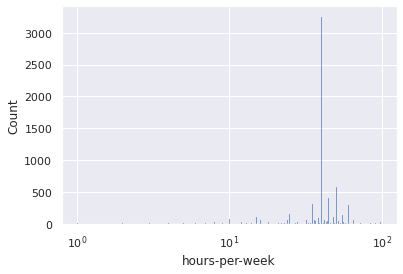

In [10]:
sns.histplot(data = df, x = 'hours-per-week', log_scale = True)

It is often useful to re-scale the plot to zoom in on the part of the y-axis range where some values are observed. To do so, we would like to re-draw the plot with the y axis ranging from 0 to around 600. We can use the `matplotlib.pyplot.ylim()` function to accomplish this.

(0.0, 600.0)

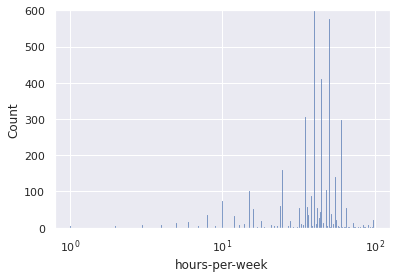

In [11]:
sns.histplot(data=df, x="hours-per-week", log_scale = True)
plt.ylim(0, 600)

###  Produce a Bar Plot for a Categorical Feature

The histogram plotting method may as well be used on categorical variables. The cell below plots the `education` column.

<AxesSubplot:xlabel='education', ylabel='Count'>

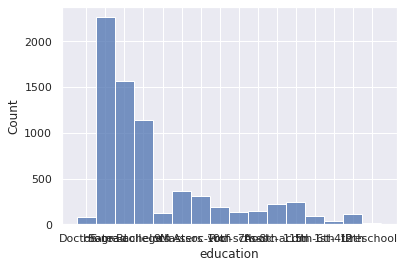

In [12]:
sns.histplot(data=df, x="education")

Notice that the labels overlap, making it difficult to read. One solution would be to rescale the image, and another one would be to rotate the labels. The code cell below accomplishes both.

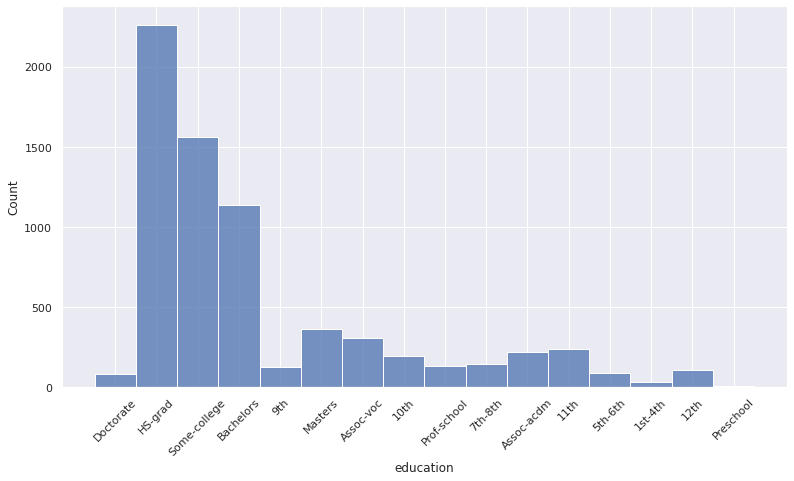

In [13]:
fig1 = plt.figure(figsize=(13,7)) #this is to rescale an image so that it is easier to read
ax = sns.histplot(data=df, x="education")
t1 = plt.xticks(rotation=45) #rotate the x-axis ticks labels

## Deep Dive: Enforcing an Order of Categories

The plot we made looks nice, but you may still find one aspect of it wanting. 'Education' levels have a natural *order* to them, and it would be much better to organize the categories of 'education' accordingly. That is: <br>

Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.

The datatype for the `education` column is `Object`.

In [14]:
np.dtype(df['education'])

dtype('O')

Python has built-in functionality for recognizing the order of categorical variables. The column must be converted from an `object` type to a `category`.

In [15]:
cat_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', 
             '9th', '10th', '11th', '12th', 'HS-grad', 
             'Prof-school', 'Assoc-acdm', 'Assoc-voc', 
             'Some-college', 'Bachelors', 'Masters', 'Doctorate']
df['education'] = pd.Categorical(df['education'], cat_order)

Now that we converted the `education` column in the dataset to an ordered categorical variable, let's reuse the same plotting code we used above:

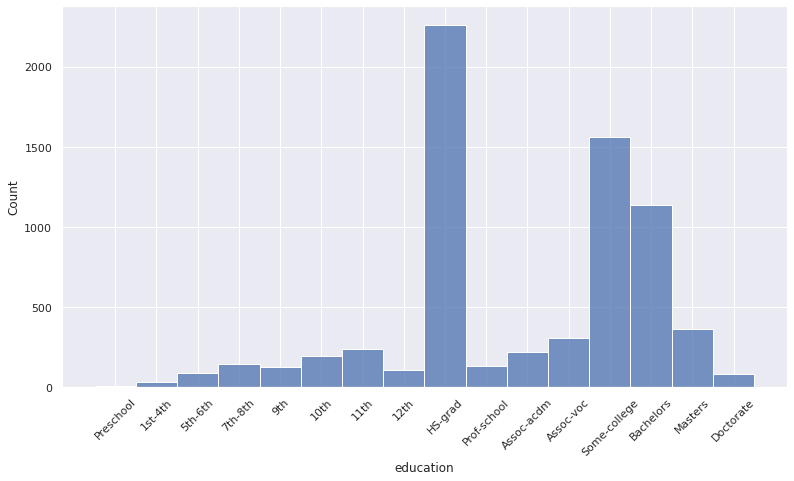

In [16]:
fig2 = plt.figure(figsize=(13,7)) 
ax = sns.histplot(data=df, x="education")
t2 = plt.xticks(rotation=45)

This plot is much easier to understand and analyze!